### Data Science Jobs in the US
  
In this project I'm analysing [Kaggle DS&ML Survey 2018](https://www.kaggle.com/kaggle/kaggle-survey-2018) to see how well some data science professions are doing in the US compared to the rest of the world.

#### DATASET  
  
##### THE POLLSTER
The data was collected by Kaggle which is an online community of Data Scientists and Machine Learners, in their own words *"Kaggle enables data scientists and other developers to engage in running machine learning contests, write and share code, and to host datasets."*  
  
##### THE SURVEY

"This survey received 23,859 usable respondents from 147 countries and territories. If a country or territory received less than 50 respondents, we grouped them into a group named “Other” for anonymity.

We excluded respondents who were flagged by our survey system as “Spam”.

Most of our respondents were found primarily through Kaggle channels, like our email list, discussion forums and social media channels.

The survey was live from October 22nd to October 29th. We allowed respondents to complete the survey at any time during that window. The median response time for those who participated in the survey was 15-20 minutes.

Not every question was shown to every respondent. You can learn more about the different segments we used in the schema.csv file.

To protect the respondents’ identity, the answers to multiple choice questions have been separated into a separate data file from the open-ended responses. We do not provide a key to match up the multiple choice and free form responses. Further, the free form responses have been randomized column-wise such that the responses that appear on the same row did not necessarily come from the same survey-taker." **[Kaggle](https://www.kaggle.com/kaggle/kaggle-survey-2018)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

Load a the first few columns of the dataset and rename them

In [3]:
#data https://www.kaggle.com/kaggle/kaggle-survey-2018
cols = np.arange(0,51)
df = pd.read_csv('multipleChoiceResponses.csv', header=0, skiprows = [1], usecols=cols)
df.drop(list(df.filter(regex = '_TEXT')), axis = 1, inplace = True)
# rename columns
col_name = ['DURATION','GENDER','AGE', 'COUNTRY', 'EDUCATION', 'MAJOR', 'JOB_TITLE', 
            'INDUSTRY', 'YEARS_EXP', 'COMPENSATION_USD', 'EMPLOYER_USE_ML', 'ANALYZE_DATA', 
            'BUILD/RUN_ML', 'BUILD/RUN_DATA_INFRA', 'BUILD_ML_PROTOTYPES', 'RESEARCH_ML', 
            'NO_ACTIVITY', 'OTHER', 'PRIMARY_ANALYSIS_TOOL', 'JUPYTER/IPYTHON', 'RSTUDIO', 
            'PYCHARM', 'VISUAL_STUDIO_CODE', 'NTERACT', 'ATOM', 'MATLAB', 'VISUAL_STUDIO', 
            'NOTEPAD++', 'SUBLIME_TEXT', 'VIM','INTELLIJ', 'SPYDER', 'NO_IDE', 'OTHER']
df = df.iloc[:,:len(col_name)]
df.columns = col_name
df.head()

,DURATION,GENDER,AGE,COUNTRY,EDUCATION,MAJOR,JOB_TITLE,INDUSTRY,YEARS_EXP,COMPENSATION_USD,...,ATOM,MATLAB,VISUAL_STUDIO,NOTEPAD++,SUBLIME_TEXT,VIM,INTELLIJ,SPYDER,NO_IDE,OTHER
0,710,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",...,NaN,MATLAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,...,NaN,NaN,Visual Studio,NaN,NaN,Vim,NaN,NaN,NaN,NaN
4,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CLEANING
  
I started by checking the titles of the professionals that responded to the survey and them proceded with some cleaning, focusing on the titles:  
'Data Scientist', 'Data Analyst', 'Research Scientist', 'Business Analyst', 'Data Engineer', 'Statistician'  
  
Then I removed the respondents that identified themselfs as students and the ones that didn't performed any task related to data analysis and data science.

In [4]:
df.JOB_TITLE.unique()

array(['Consultant', 'Other', 'Data Scientist', 'Not employed',
       'Data Analyst', 'Software Engineer', 'Student',
       'Research Assistant', 'Chief Officer', 'Manager',
       'Research Scientist', 'Business Analyst', 'Data Engineer',
       'Developer Advocate', 'Marketing Analyst',
       'Product/Project Manager', 'Principal Investigator', 'Salesperson',
       'DBA/Database Engineer', 'Statistician', 'Data Journalist', nan],
      dtype=object)

In [5]:
# filter job title
df = df[df.JOB_TITLE.isin(['Data Scientist', 'Data Analyst', 
                           'Research Scientist', 'Business Analyst',
                           'Data Engineer','Statistician'])]

# filter industry 
df.drop(df[df.INDUSTRY == 'I am a student'].index, axis = 0, inplace = True)

# filter Activity
temp='None of these activities are an important part of my role at work'
df.drop(df[df.NO_ACTIVITY == temp].index, axis = 0, inplace = True)

Education and industry were also cleaned since there were some categories with very low sample size

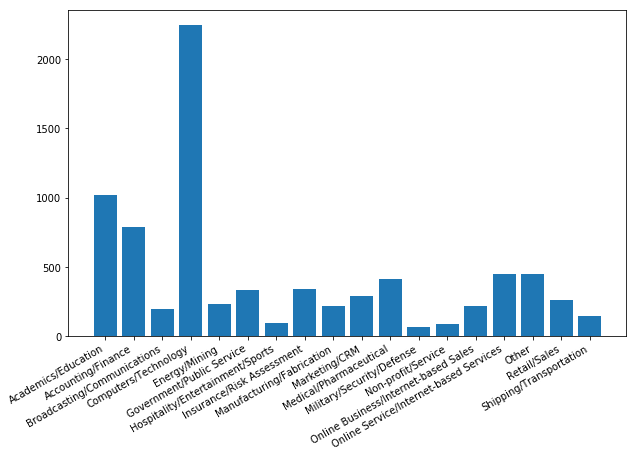

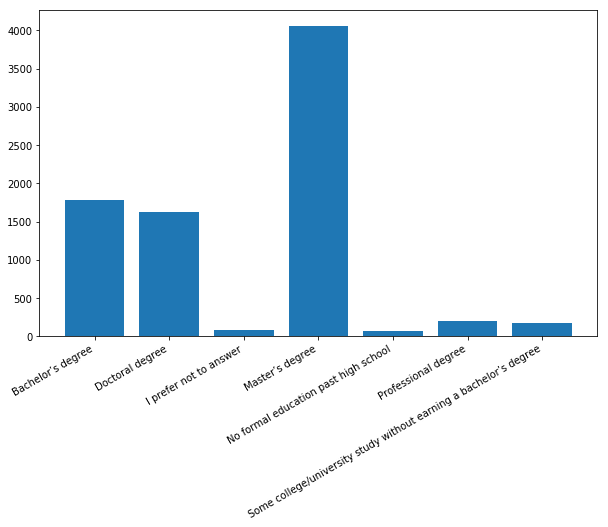

In [6]:
# plot industry distribution
ind = df.groupby(by='INDUSTRY')['INDUSTRY']
fig, ax = plt.subplots(1,figsize=(10,6))
plt.bar(ind.count().index, ind.count().values)
ax.set_xticklabels(ind.count().index, rotation=30, ha='right')
plt.show()

# plot education distribution
ed = df.groupby(by='EDUCATION')['EDUCATION']
fig, ax = plt.subplots(1,figsize=(10,6))
plt.bar(ed.count().index, ed.count().values)
ax.set_xticklabels(ed.count().index, rotation=30, ha='right')
plt.show()

# remove categories
df = df[df.EDUCATION.isin(["Bachelor’s degree", "Doctoral degree", "Master’s degree"])]
df = df[df.INDUSTRY.isin(['Computers/Technology', 'Academics/Education', 'Accounting/Finance', 
                          'Online Service/Internet-based Services', 'Medical/Pharmaceutical', 
                          'Insurance/Risk Assessment', 'Government/Public Service', 
                          'Marketing/CRM'])]

Some majors were also removed for not having enough respondents, others were reclassified as:  
STEM;  
BUSINESS;  
HUMANITIES, SOCIAL OR LIFE SCIENCES;

In [7]:
# remove categories
df = df[~df.MAJOR.isin(['I never declared a major', 'Fine arts or performing arts', 
                        'Environmental science or geology','Other'])]
# group and rename some majors
# STEM
df.replace(['Computer science (software engineering, etc.)', 
            'Engineering (non-computer focused)', 
            'Mathematics or statistics', 'Physics or astronomy',
            'Information technology, networking, or system administration'], 
            'STEM', inplace=True)
# BUSINESS
df.replace('A business discipline (accounting, economics, finance, etc.)', 
           'BUSINESS', inplace=True)
# HUMANITIES, SOCIAL OR LIFE SCIENCES
df.replace(['Medical or life sciences (biology, chemistry, medicine, etc.)',
           'Social sciences (anthropology, psychology, sociology, etc.)',
           'Humanities (history, literature, philosophy, etc.)'], 
           'HUMANITIES, SOCIAL OR LIFE SCIENCES', inplace=True)

#### Countries

In [8]:
# clean some names
df = df.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom').copy()
df = df.replace('Iran, Islamic Republic of...','Iran').copy()
# define groups of countries
europe = ['Turkey', 'Hungary', 'Ireland', 'France', 'Spain', 'United Kingdom', 'Poland',
          'Denmark', 'Netherlands', 'Sweden', 'Russia', 'Portugal', 'Italy', 'Germany',
          'Czech Republic', 'Ukraine', 'Switzerland', 'Romania', 'Belarus', 'Belgium', 
          'Finland', 'Norway', 'Greece', 'Austria']

rest = [x for x in df.COUNTRY.unique() if x not in europe+['United States of America', 
                                                           'China', 'India']]

In [9]:
df.head()

,DURATION,GENDER,AGE,COUNTRY,EDUCATION,MAJOR,JOB_TITLE,INDUSTRY,YEARS_EXP,COMPENSATION_USD,...,ATOM,MATLAB,VISUAL_STUDIO,NOTEPAD++,SUBLIME_TEXT,VIM,INTELLIJ,SPYDER,NO_IDE,OTHER
5,1142,Male,25-29,Colombia,Bachelor’s degree,STEM,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...,...,Atom,NaN,NaN,NaN,NaN,Vim,NaN,NaN,NaN,NaN
15,1153,Male,25-29,Japan,Master’s degree,STEM,Data Scientist,Medical/Pharmaceutical,0-1,"30-40,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1177,Female,25-29,Iran,Master’s degree,STEM,Research Scientist,Computers/Technology,0-1,"0-10,000",...,NaN,MATLAB,NaN,Notepad++,NaN,NaN,IntelliJ,NaN,NaN,NaN
24,1298,Male,30-34,United Kingdom,Master’s degree,STEM,Data Scientist,Online Service/Internet-based Services,5-10,"70-80,000",...,NaN,NaN,NaN,NaN,NaN,Vim,NaN,Spyder,NaN,NaN
27,3266,Female,30-34,United States of America,Master’s degree,"HUMANITIES, SOCIAL OR LIFE SCIENCES",Data Analyst,Computers/Technology,2-3,"80-90,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### COMPENSATION
I want to know how well those professionals are doing, so I removed respondents that didn't disclose their compensations. 
  
The experience field was also adjusted, according to wikipedia webpage on [Data Science](https://en.wikibooks.org/wiki/Data_Science:_An_Introduction/A_History_of_Data_Science) *"The term was first coined in 2001. Its popularity has exploded since 2010, pushed by the need for teams of people to analyze the big data that corporations and governments are collecting."*  
  
So the respondents that answered 30+ years of experience were probably accounting for other experiences that maybe or maybe not related to Data Science, to avoid any misrepresentation I redesigned the bins as:  
  
0-5 - Which should represent people that are relativelly new to the field;  
5-15 - Which should represent people that are in the field since it's boom;  
15+ - Which should represent people who worked in a related field and migrated to Data Science;

In [10]:
# create a new data frame without undisclosed and missing compensations values
undisclosed = 'I do not wish to disclose my approximate yearly compensation'
df_wage = df.drop(df[df.COMPENSATION_USD == undisclosed].index, axis = 0).copy()
df_wage = df_wage.dropna(subset=['COMPENSATION_USD']).copy()

# create new bins for years of experience 
df_wage.replace(['0-1','1-2','2-3','3-4','4-5'], '0-5', inplace=True)
df_wage.replace(['5-10','10-15'], '5-15', inplace=True)
df_wage.replace(['15-20','20-25','25-30','30 +'], '15+', inplace=True)

df_wage.head()

,DURATION,GENDER,AGE,COUNTRY,EDUCATION,MAJOR,JOB_TITLE,INDUSTRY,YEARS_EXP,COMPENSATION_USD,...,ATOM,MATLAB,VISUAL_STUDIO,NOTEPAD++,SUBLIME_TEXT,VIM,INTELLIJ,SPYDER,NO_IDE,OTHER
15,1153,Male,25-29,Japan,Master’s degree,STEM,Data Scientist,Medical/Pharmaceutical,0-5,"30-40,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1177,Female,25-29,Iran,Master’s degree,STEM,Research Scientist,Computers/Technology,0-5,"0-10,000",...,NaN,MATLAB,NaN,Notepad++,NaN,NaN,IntelliJ,NaN,NaN,NaN
24,1298,Male,30-34,United Kingdom,Master’s degree,STEM,Data Scientist,Online Service/Internet-based Services,5-15,"70-80,000",...,NaN,NaN,NaN,NaN,NaN,Vim,NaN,Spyder,NaN,NaN
27,3266,Female,30-34,United States of America,Master’s degree,"HUMANITIES, SOCIAL OR LIFE SCIENCES",Data Analyst,Computers/Technology,0-5,"80-90,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1023,Female,40-44,Poland,Master’s degree,STEM,Business Analyst,Computers/Technology,5-15,"10-20,000",...,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Break compensation bins to estimate mean
temp = []
for element in df_wage['COMPENSATION_USD'].values:
    if '+' in element:
        temp.append(None)
    else:
        i = element.replace(',','').split('-')
        low_bound = (int(i[0]+'000'))
        high_bound = int(i[1])
        temp.append((low_bound+high_bound)/2)
        
df_wage['COMPENSATION_MEAN'] = temp
df_wage['COMPENSATION_MEAN'].head()

15    35000.0
23     5000.0
24    75000.0
27    85000.0
28    15000.0
Name: COMPENSATION_MEAN, dtype: float64

#### VIZUALIZATIONS
Now the data should represent the public I'm interrested in knowing more about, so I can start plotting compensation comparisons between the US and the rest of the world according to the different factors accounted in the survey.  
  
You can change the 'var' and 'title' field to switch between the factors available. 

(10000, 160000)

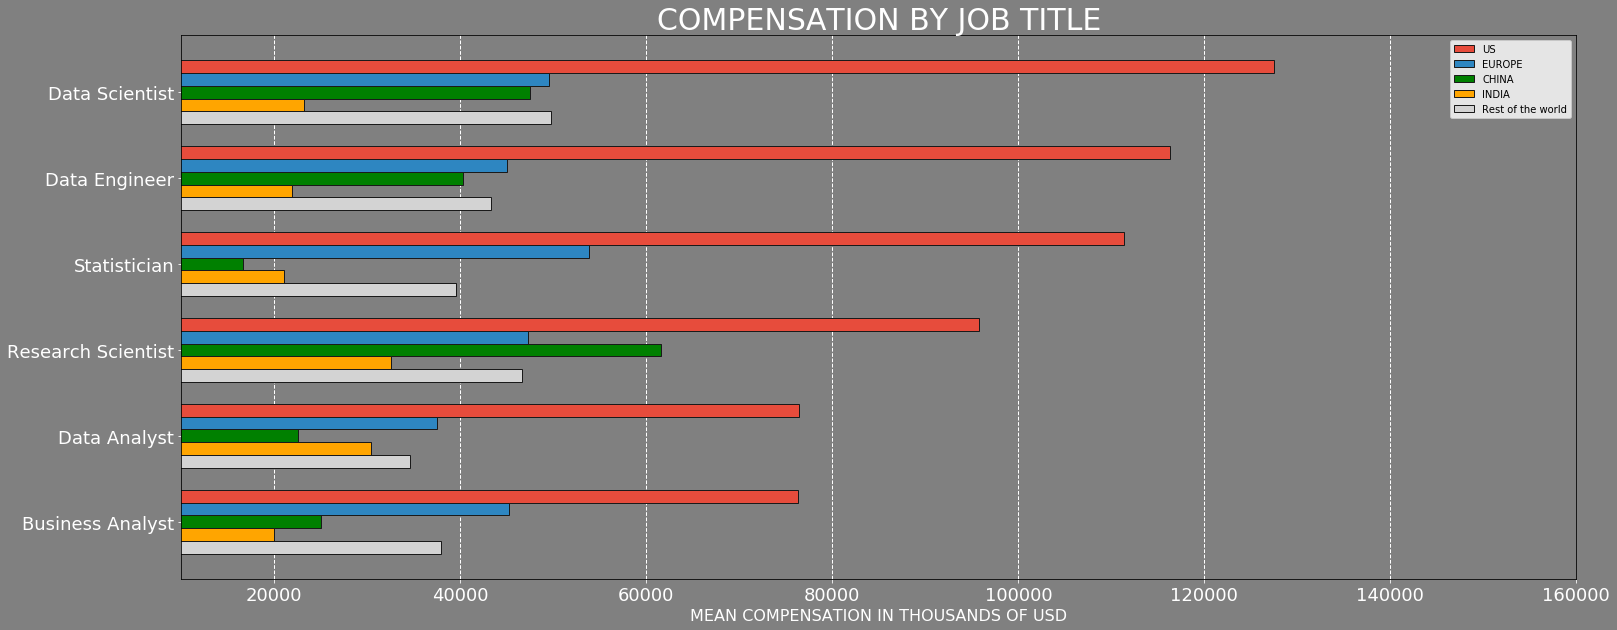

In [12]:
# Compare average compensation in the US vs the rest of the world by different factors
# 'GENDER', 'AGE', 'COUNTRY', 'EDUCATION', 'MAJOR', 'JOB_TITLE', 'INDUSTRY', 'YEARS_EXP'

var = 'JOB_TITLE'
title = 'COMPENSATION BY JOB TITLE'

# get averages and variable names
name = df_wage.groupby(var)['COMPENSATION_MEAN'].mean().index

# groups
mean = df_wage[df_wage.COUNTRY.isin(rest)].groupby(var)['COMPENSATION_MEAN']
mean_europe = df_wage[df_wage.COUNTRY.isin(europe)].groupby(var)['COMPENSATION_MEAN']
              
# countries
mean_us = df_wage[df_wage.COUNTRY == "United States of America"].groupby(var)['COMPENSATION_MEAN']
mean_china = df_wage[df_wage.COUNTRY == "China"].groupby(var)['COMPENSATION_MEAN']
mean_india = df_wage[df_wage.COUNTRY == "India"].groupby(var)['COMPENSATION_MEAN']

# assign them to a new data frame
df_var = pd.DataFrame({'NAME':name, 'MEAN':mean.mean().values,'MEAN_US':mean_us.mean().values, 
                       'MEAN_EUR':mean_europe.mean().values,'MEAN_CHINA':mean_china.mean().values,
                       'MEAN_INDIA':mean_india.mean().values})
df_var = df_var.sort_values(by='MEAN_US')

# plot figure and set bg colors
fig, ax = plt.subplots(1,figsize=(25,10))
fig.patch.set_facecolor('grey')
ax.set_facecolor('grey')

# plot x-axis grid lines and set them below
ax.grid(color='white', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

# plot bars
ind = np.arange(len(df_var['NAME']))
plt.barh(ind, df_var['MEAN_US'], height=0.15, color='#E74C3C', edgecolor= '0.1')
plt.barh(ind-0.15, df_var['MEAN_EUR'], height=0.15, color='#2E86C1', edgecolor= '0.1')
plt.barh(ind-0.3, df_var['MEAN_CHINA'], height=0.15, color='green', edgecolor= '0.1')
plt.barh(ind-0.45, df_var['MEAN_INDIA'], height=0.15, color='orange', edgecolor= '0.1')
plt.barh(ind-0.6, df_var['MEAN'], height=0.15, color='lightgrey', edgecolor= '0.1')
# set y ticks
ax.set(yticks=ind-0.3, yticklabels=df_var['NAME'])

# set labels, legends, titles...
ax.legend(['US','EUROPE','CHINA','INDIA','Rest of the world'])
plt.title(title, fontsize=30, color='white')
plt.xlabel('MEAN COMPENSATION IN THOUSANDS OF USD', fontsize=16, color='white')
ax.tick_params(axis='both', colors='white', labelsize=18)

# set x limits
plt.xlim(10000,160000)

# adjust chart position and save pic
#plt.gcf().subplots_adjust(left=0.35)
#plt.savefig(var + '.png', facecolor=fig.get_facecolor(), edgecolor='none')

Industry:
![INDUSTRY](https://i.imgur.com/ZrvvOai.png)

Education:  
![EDUCATION](https://i.imgur.com/dQ33yv8.png)

Major:
![MAJOR](https://i.imgur.com/ov1bpQE.png)

Years of Experience:
![years_exp](https://i.imgur.com/YnGeDsX.png)  

#### Education vs Industry
As visualized in the previous charts comparing the average compensation by education, your academic level will reflect in your compensation, but China shows a different perspective of this since their masters are getting in average more compensation than their doctors.  
  
Why is it different there?  
  
To investigate the reasons behind this we can check the industry those professionals are working since the industry was one of the factors with the highest impact on the compensation.

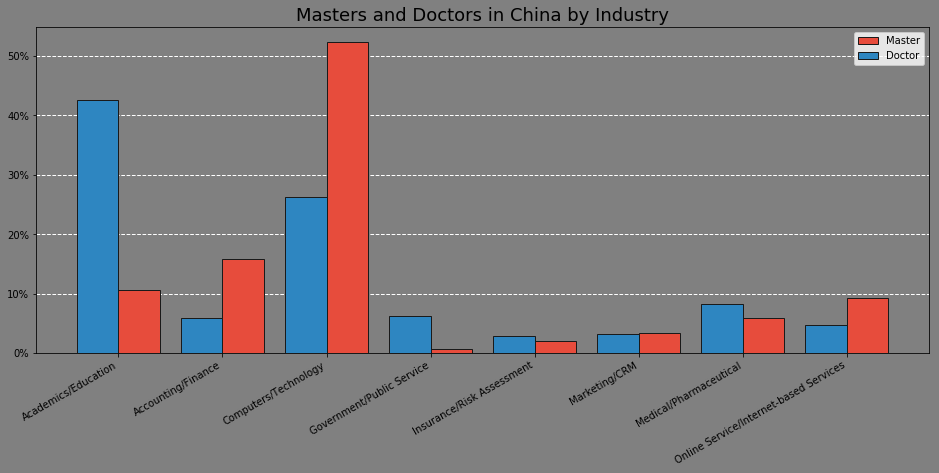

In [13]:
china = df[df['COUNTRY']=='China']
# get the total of respondents in china with a masters degree and total by industry
n_mas = china[china['EDUCATION']=='Master’s degree'].count()[0]
m = china[china['EDUCATION']=='Master’s degree'].groupby(by='INDUSTRY')['INDUSTRY'].count()

# get the total of respondents in china with a masters degree and total by industry
n_doc = df[df['EDUCATION']=='Doctoral degree'].count()[0]
d = df[df['EDUCATION']=='Doctoral degree'].groupby(by='INDUSTRY')['INDUSTRY'].count()

# plot distribution
fig, ax = plt.subplots(1,1,figsize=(16,6))
plt.bar(m.index, m.values/n_mas, color='#E74C3C', edgecolor='0.1', width=0.4, align='edge')
plt.bar(d.index, d.values/n_doc, color='#2E86C1', edgecolor='0.1', width=-0.4, align='edge')

# adjust colors, title, ticks and labels
fig.patch.set_facecolor('grey')
ax.set_facecolor('grey')
plt.title("Masters and Doctors in China by Industry", fontsize=18)
plt.legend(['Master','Doctor'])
ax.grid(color='white', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)
ax.set_xticklabels(m.index, rotation=30, ha='right')
yticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yticks])
    
plt.show()

#### Finding:
As we can see most professionals with a doctoral degree in China are working in the academic/education field, while their peers with a masters degree are going to computer/technology.  

Those are the extreme opposites industries when compared by compensation, computer/technology is the one with the highest average compensation and academics/education the lowest.

#### MAPS
Another way of visualizing those differences is to use maps, this way we can see the information by country.  


In [14]:
# Define function for ploting color maps
def plot_map(df_country, vmin, vmax, tick_labels, title):
    colors = [(0.18, 0.53, 0.76), (0.94, 0.24, 0.18)]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

    # load maps and remove antarctic
    df_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

    # build a dataframe with the selected field
    df_item = df_country.filter(items=['COUNTRY','MEAN']).copy()
    df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'COUNTRY')

    # set figure, axis and bg color
    fig, ax = plt.subplots(1,1,figsize=(40,20))
    fig.patch.set_facecolor('grey')

    # plot a background map
    df_map.plot(ax=ax, color='black', alpha=0.15, edgecolor='0.2')

    # drop not listed countries and plot colormap
    df_map.dropna(inplace=True)
    df_map.plot(column='MEAN', cmap=cmap, ax=ax, vmin=vmin, vmax=vmax, edgecolor='0.2')
    # title
    plt.title(title, fontsize='38', color='white')

    # set an axis for the color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("left", size="3%", pad=0.05)
    # color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.set_yticklabels(tick_labels, color='white')
    # hide map axis
    ax.axis('off')
    # save pic 
    #plt.savefig('filename' + '.png', facecolor=fig.get_facecolor(), edgecolor='none')

##### DATA SCIENTISTS AVERAGE COMPENSATION BY COUNTRY
I selected only professionals with the title of Data Scientist, checked the top 5 countries and plotted the map with the global averages

In [15]:
# create a data frame to hold the mean compensation for each country for Data Scientists only
ds = df_wage[df_wage['JOB_TITLE']=='Data Scientist'].groupby('COUNTRY')['COMPENSATION_MEAN'].mean()
df_country = pd.DataFrame({'COUNTRY':ds.index, 'MEAN':ds.values})

In [16]:
# check the top averages
df_country.sort_values(by='MEAN', ascending=False).head()

,COUNTRY,MEAN
56,United States of America,127519.920319
50,Switzerland,113166.666667
1,Australia,99333.333333
25,Israel,98445.945946
42,Republic of Korea,95000.000000


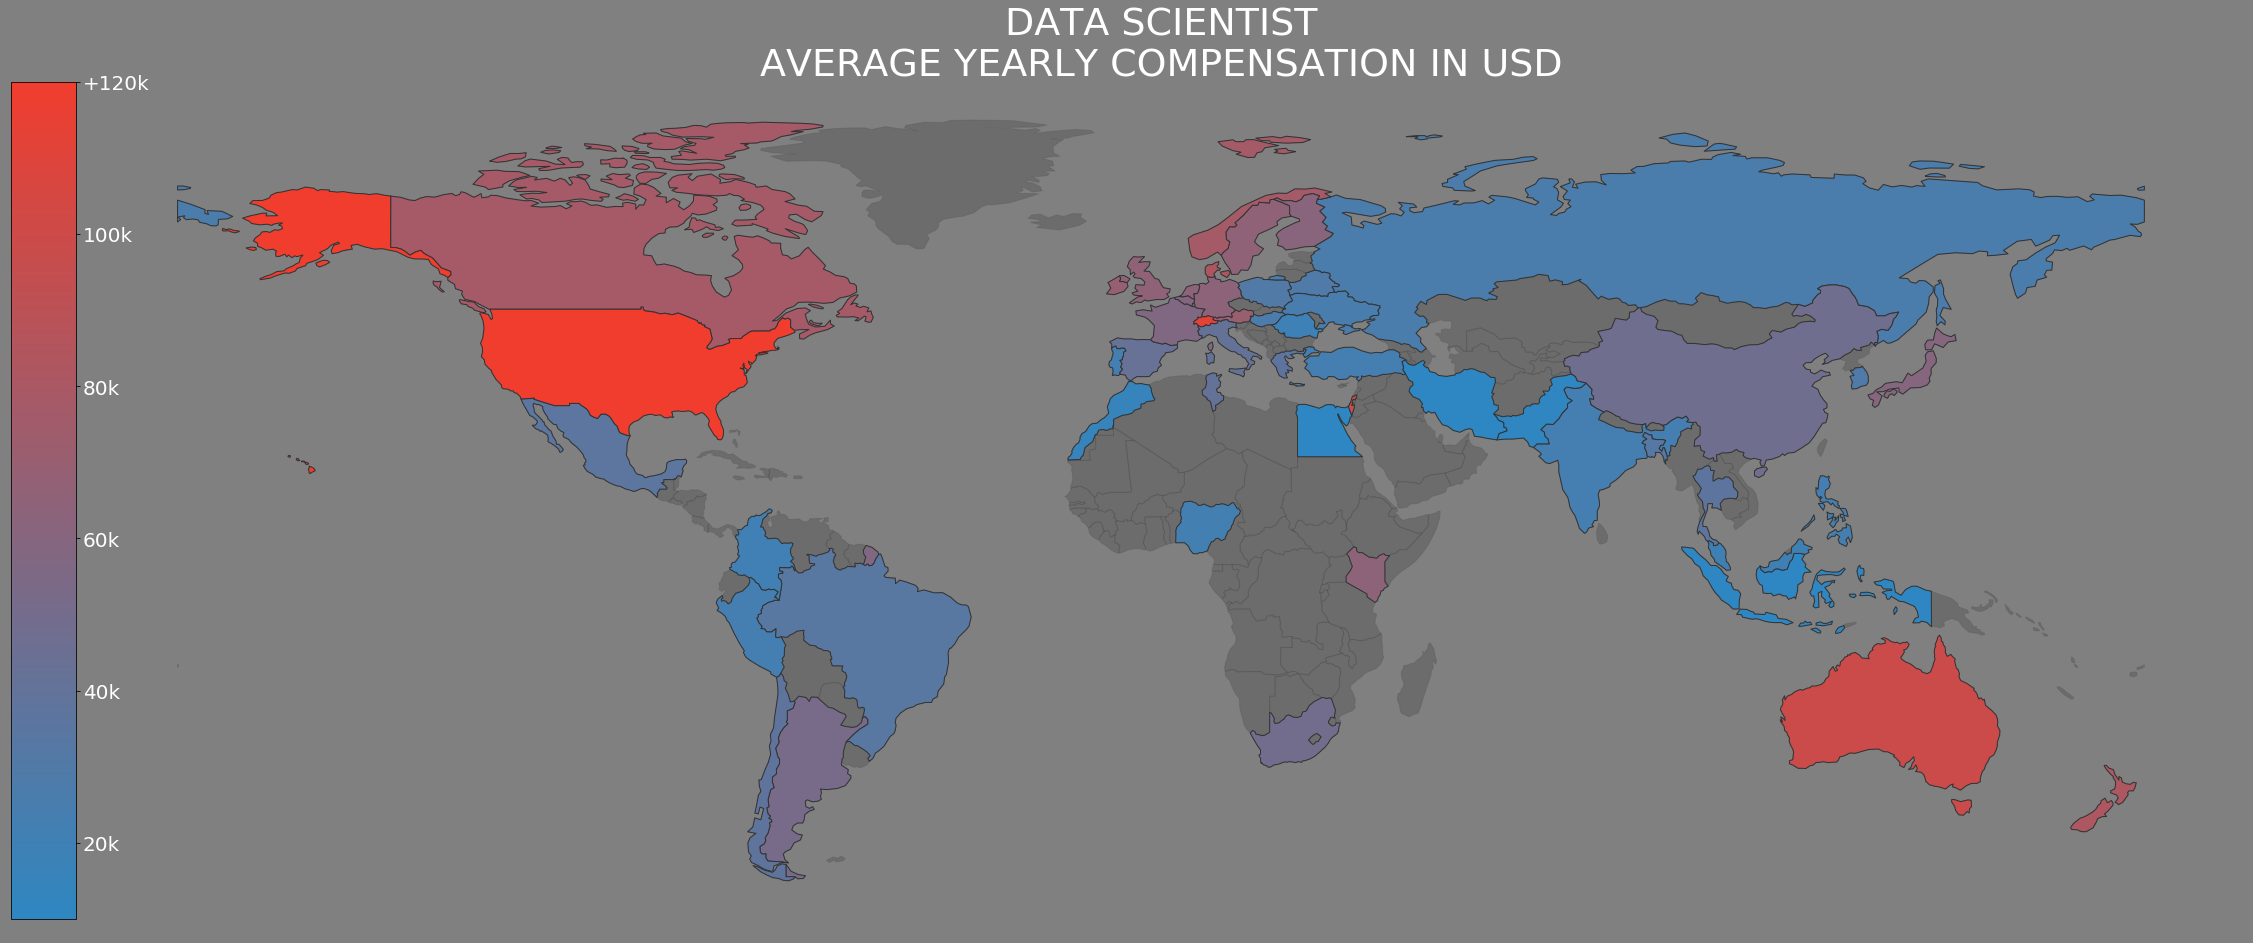

In [17]:
# plot average compensation map
vmin = 10000
vmax = 120000
tick_labels = ['20k', '40k', '60k', '80k', '100k', '+120k']
title = 'DATA SCIENTIST\nAVERAGE YEARLY COMPENSATION IN USD'

plot_map(df_country, vmin, vmax, tick_labels, title)

##### DATA SCIENTISTS AVERAGE COMPENSATION BY EXPERIENCE
Maps of data scientists compensation by years of experience

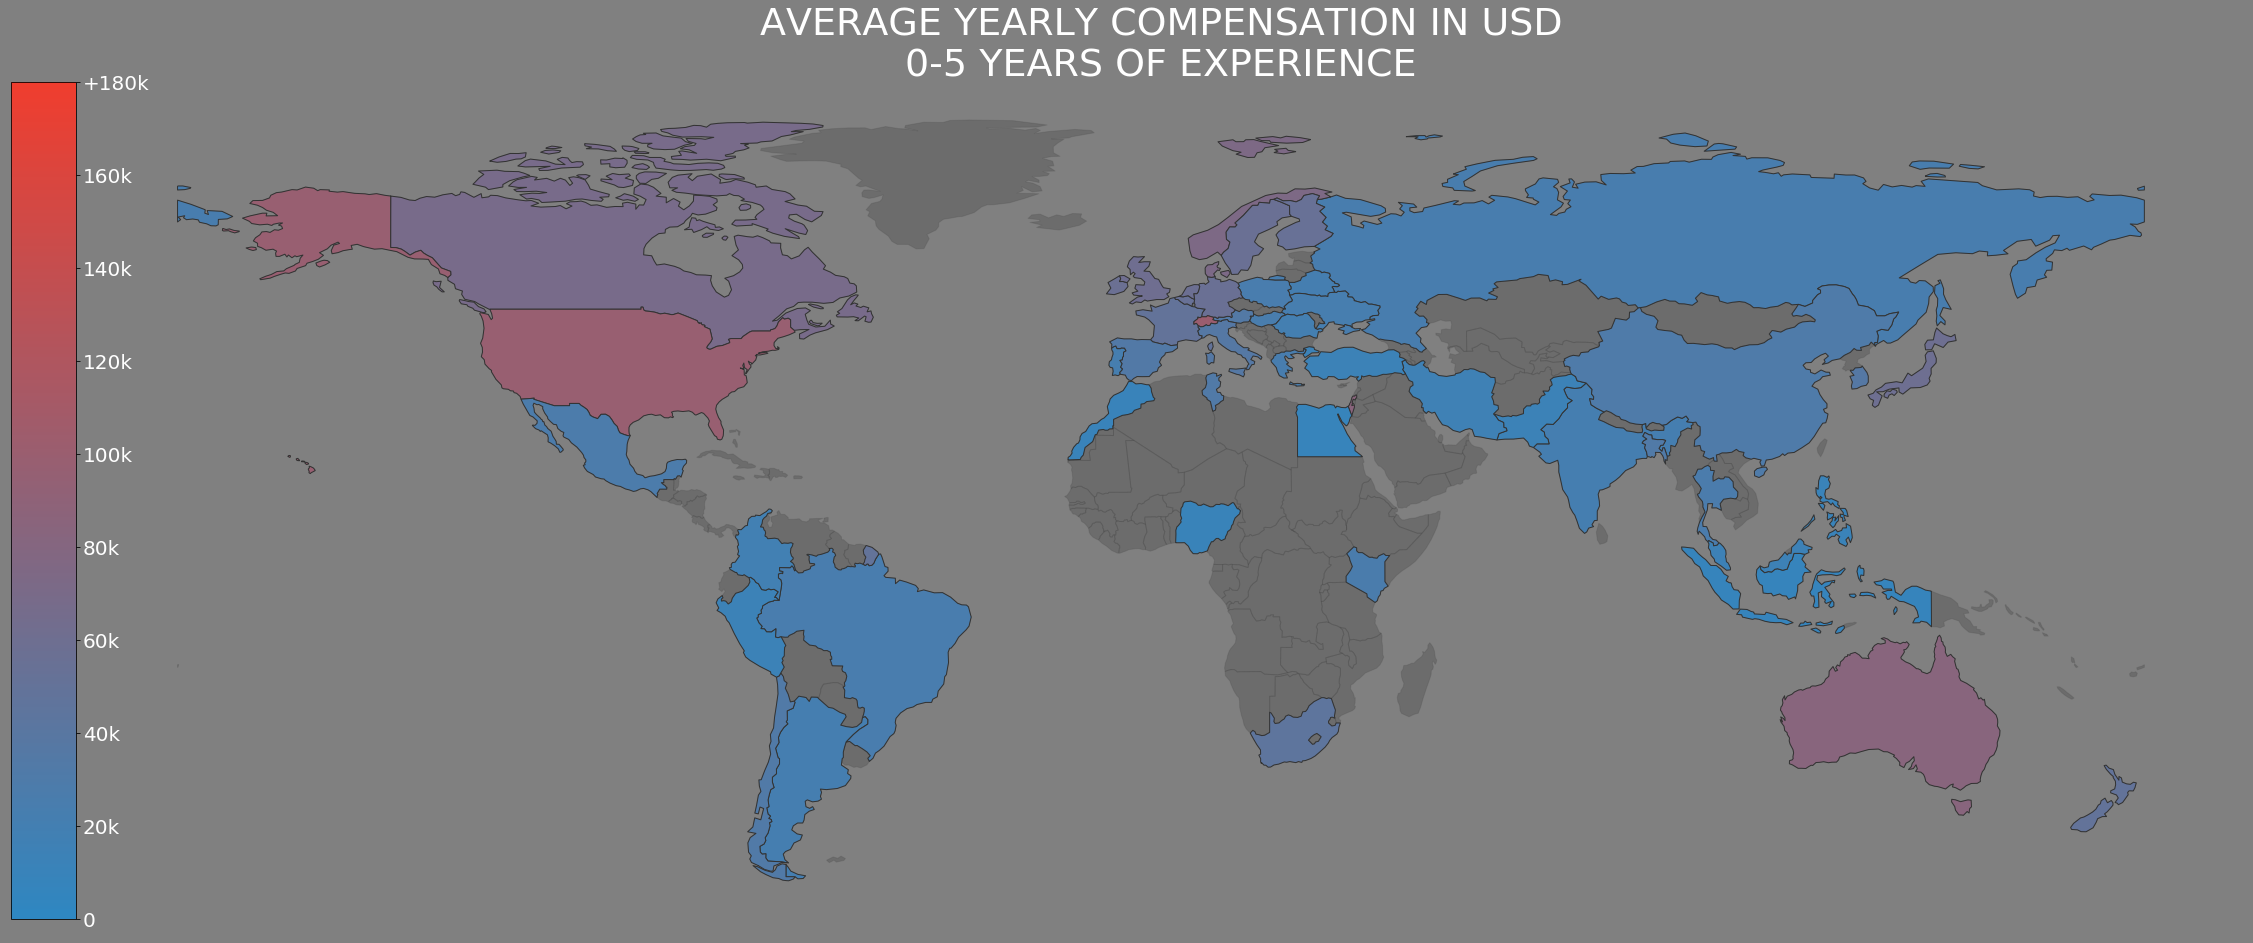

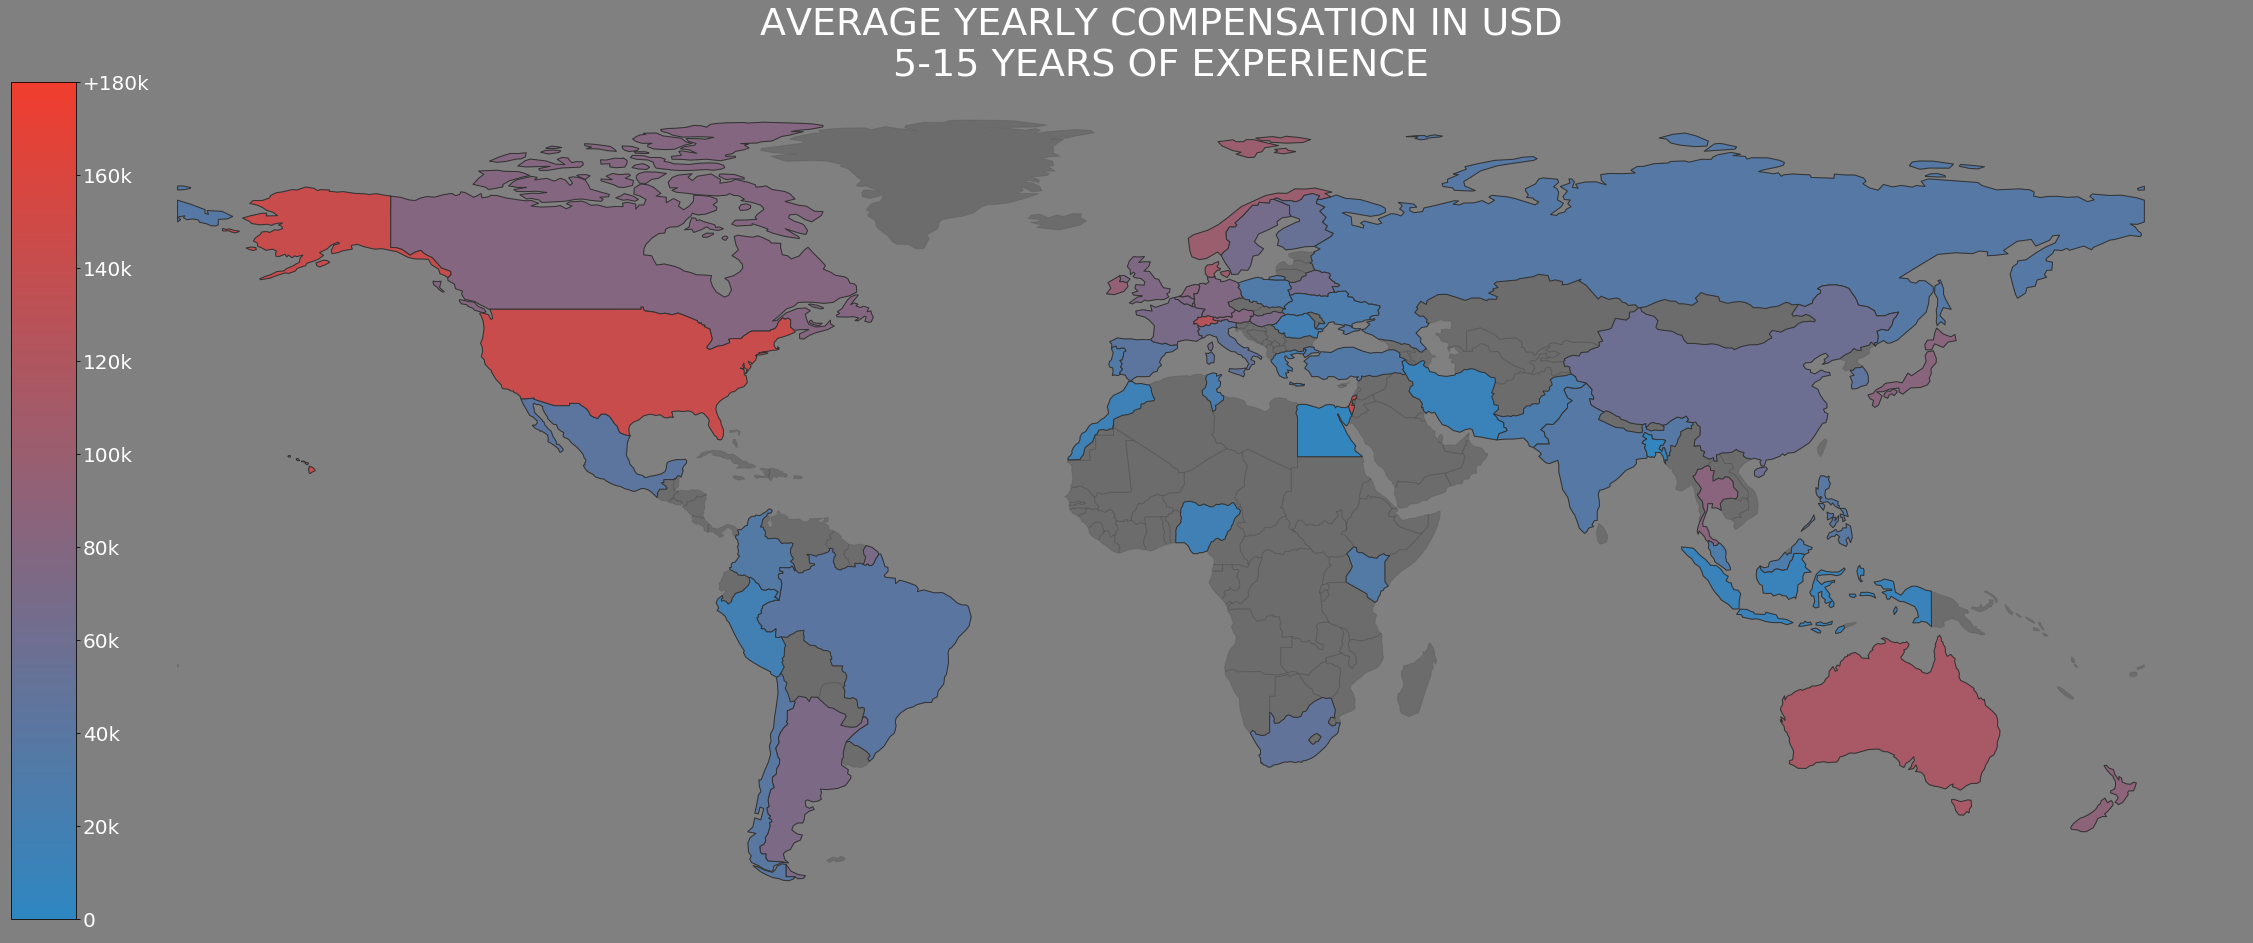

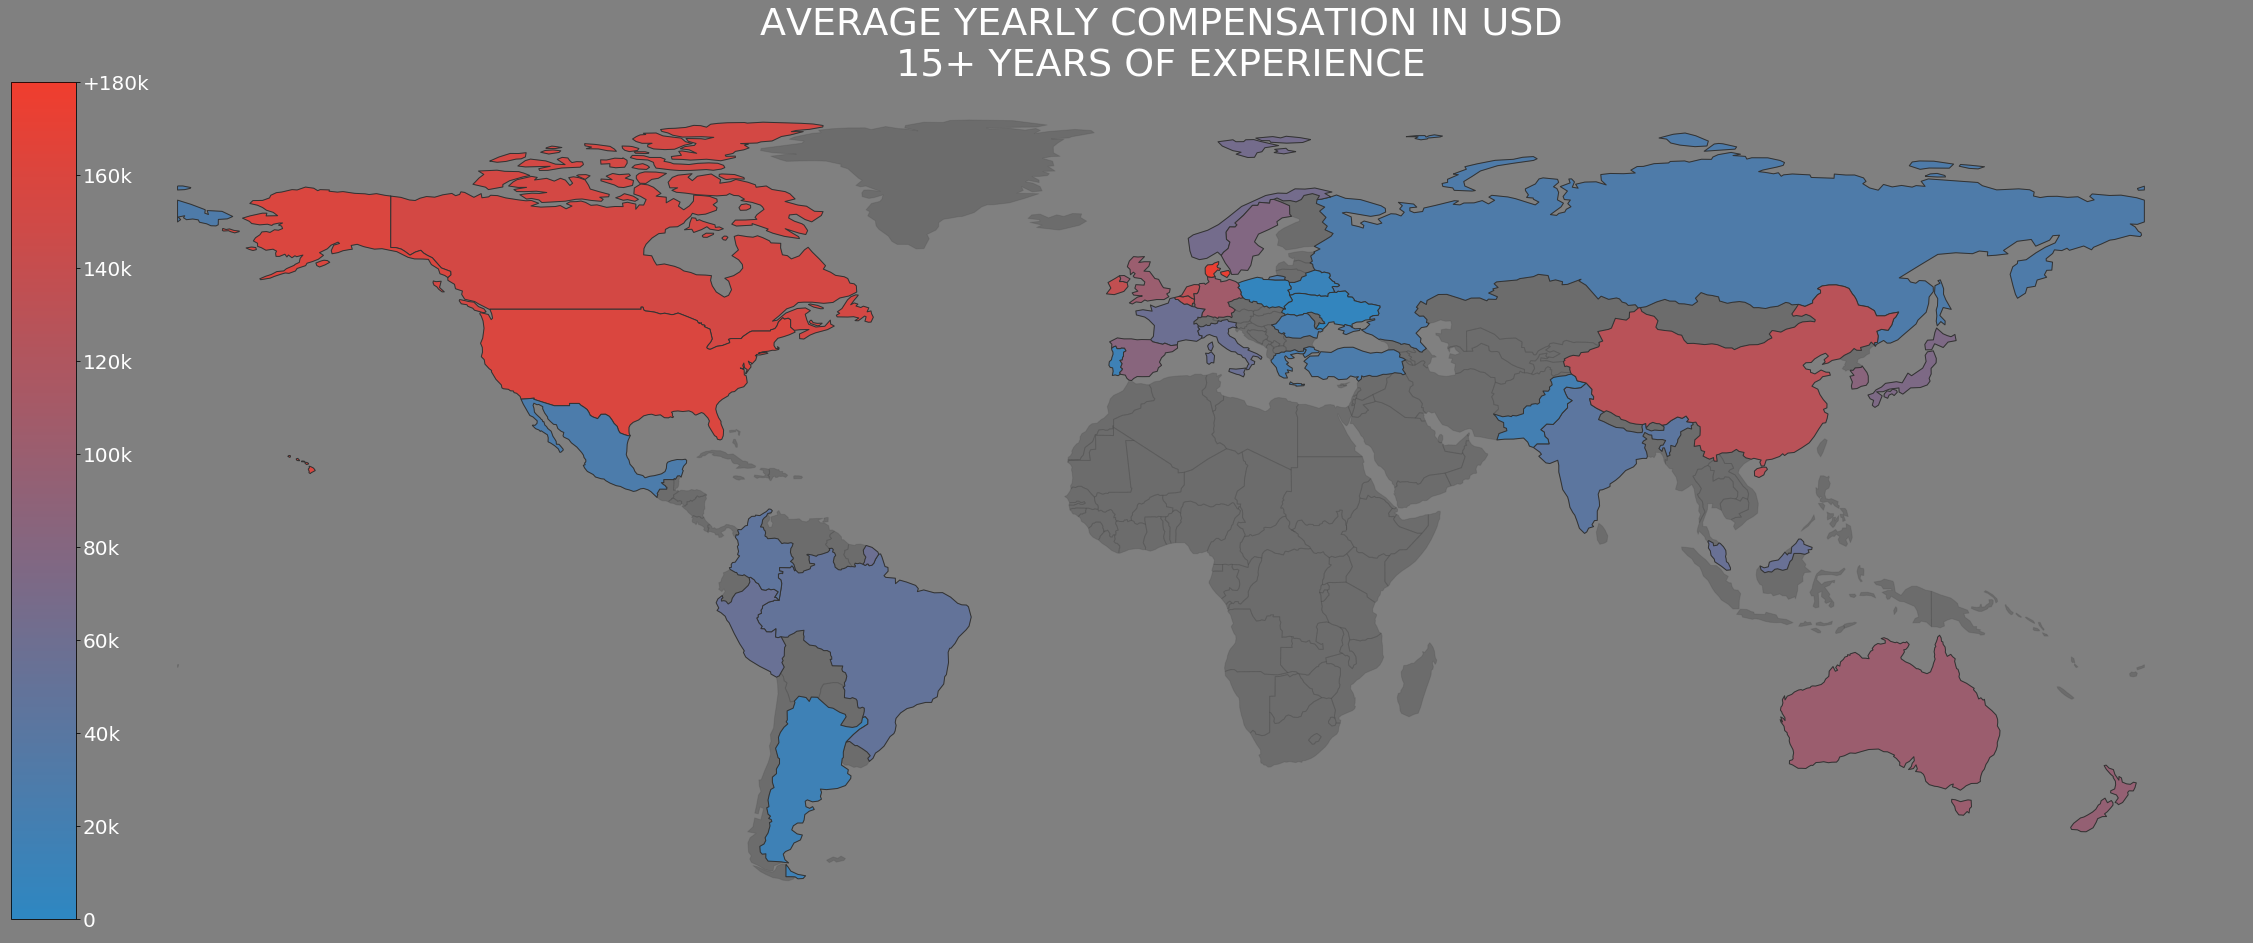

In [18]:
# plot a map for each bin 
var = 'YEARS_EXP'
var_title = ' YEARS OF EXPERIENCE'
#var_bins = df_wage[var].sort_values().dropna().unique()
var_bins = ['0-5','5-15','15+']
vmin = 0
vmax = 180000
tick_labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '+180k']

for i in var_bins:
    # get compensation mean by country
    name = df_wage[df_wage[var] == i].groupby('COUNTRY')['COMPENSATION_MEAN'].mean().index
    mean = df_wage[df_wage[var] == i].groupby('COUNTRY')['COMPENSATION_MEAN'].mean().values
    df_xpmap = pd.DataFrame({'COUNTRY':name, 'MEAN':mean})

    title = 'AVERAGE YEARLY COMPENSATION IN USD\n'+str(i)+var_title
    plot_map(df_xpmap, vmin, vmax, tick_labels, title)